## <center>**Universidade do Estado do Amazonas**</center>
###  <center>Escola Superior de Tecnologia</center>
#####  <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
#####  <center>**Estatística para Ciência de Dados** (Turma 02)</center>
---
## <center>**Trabalho Estatística para Ciência de Dados**</center>
##### <center>**Professor Felicien Goncalves Vasquez**</a></center>
###### <center>Equipe: Daniel Soares, Genilson Ferreira, Heryck Barbosa, Klemerson Silva,  Leonardo Rocha </center>


## **Bibliotecas utilizadas**

In [1]:
import pandas as pd
import numpy as np
import math
import statistics as st
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t,norm
%matplotlib inline

## **Importação do DataFrame: (Perfis do eleitorado brasileiro em 2020)**

In [ ]:
from google.colab import drive #importanto do google drive. Opção para usar o dataset direto do drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo o dataset direto do drive
df_completo = pd.read_csv('/content/drive/MyDrive/perfil_eleitorado_ATUAL.csv', sep=';', encoding='latin-1')

In [2]:
# Ou lendo o dataset direto do repositório do bitbucket na qual foi armazenado e 
df_completo = pd.read_csv('https://bitbucket.org/klemersoncastro/ds-estatistica-uea/raw/60167c378d9db56023134a1db4179440236ee39d/perfil_eleitorado_ATUAL.csv', sep=';', encoding='latin-1')

https://dados.gov.br/dataset/perfil-do-eleitorado-em-cada-eleicao

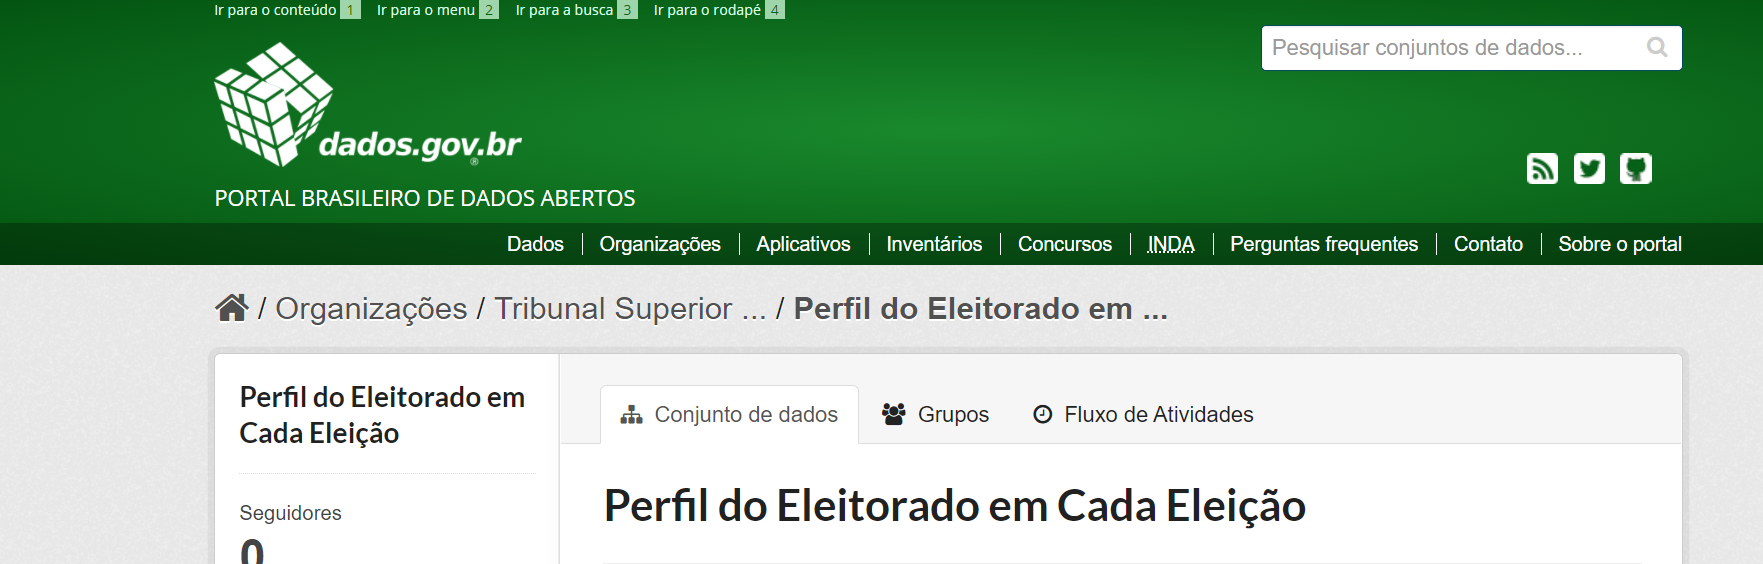

In [3]:
# Visualizando os campos do dataset
df_completo.head().T

,0,1,2,3,4
DT_GERACAO,11/11/2020,11/11/2020,11/11/2020,11/11/2020,11/11/2020
HH_GERACAO,21:20:42,21:20:42,21:20:42,21:20:42,21:20:42
ANO_ELEICAO,9999,9999,9999,9999,9999
SG_UF,BA,BA,BA,BA,BA
CD_MUNICIPIO,37494,37494,37494,37494,37494
NM_MUNICIPIO,MUTUÍPE,MUTUÍPE,MUTUÍPE,MUTUÍPE,MUTUÍPE
CD_MUN_SIT_BIOMETRIA,-1,-1,-1,-1,-1
DS_MUN_SIT_BIOMETRIA,#NULO#,#NULO#,#NULO#,#NULO#,#NULO#
NR_ZONA,109,109,109,109,109
CD_GENERO,2,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306904 entries, 0 to 4306903
Data columns (total 11 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   SG_UF                       object
 1   NR_ZONA                     int64 
 2   DS_GENERO                   object
 3   DS_ESTADO_CIVIL             object
 4   CD_FAIXA_ETARIA             int64 
 5   DS_FAIXA_ETARIA             object
 6   DS_GRAU_ESCOLARIDADE        object
 7   QT_ELEITORES_PERFIL         int64 
 8   QT_ELEITORES_BIOMETRIA      int64 
 9   QT_ELEITORES_DEFICIENCIA    int64 
 10  QT_ELEITORES_INC_NM_SOCIAL  int64 
dtypes: int64(6), object(5)
memory usage: 361.4+ MB


In [8]:
# Selecionando somente os campos necessários
df = df_completo[['SG_UF','NR_ZONA','DS_GENERO','DS_ESTADO_CIVIL','CD_FAIXA_ETARIA','DS_FAIXA_ETARIA','DS_GRAU_ESCOLARIDADE','QT_ELEITORES_PERFIL','QT_ELEITORES_BIOMETRIA','QT_ELEITORES_DEFICIENCIA','QT_ELEITORES_INC_NM_SOCIAL']]

In [24]:
# Visualizando os campos selecinados
df.head().T

,0,1,2,3,4
SG_UF,BA,BA,BA,BA,BA
NR_ZONA,109,109,109,109,109
DS_GENERO,MASCULINO,MASCULINO,MASCULINO,MASCULINO,MASCULINO
DS_ESTADO_CIVIL,SOLTEIRO,SOLTEIRO,SOLTEIRO,SOLTEIRO,SOLTEIRO
CD_FAIXA_ETARIA,4044,4044,7074,7579,7579
DS_FAIXA_ETARIA,40 a 44 anos,40 a 44 anos,70 a 74 anos,75 a 79 anos,75 a 79 anos
DS_GRAU_ESCOLARIDADE,ENSINO FUNDAMENTAL COMPLETO,ENSINO MÉDIO COMPLETO,ENSINO MÉDIO INCOMPLETO,LÊ E ESCREVE,ENSINO FUNDAMENTAL INCOMPLETO
QT_ELEITORES_PERFIL,23,87,1,33,3
QT_ELEITORES_BIOMETRIA,23,83,0,27,3
QT_ELEITORES_DEFICIENCIA,0,0,0,1,0


In [10]:
# Visualizando os campos selecinados
df

,SG_UF,NR_ZONA,DS_GENERO,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,BA,109,MASCULINO,SOLTEIRO,4044,40 a 44 anos,ENSINO FUNDAMENTAL COMPLETO,23,23,0,0
1,BA,109,MASCULINO,SOLTEIRO,4044,40 a 44 anos,ENSINO MÉDIO COMPLETO,87,83,0,0
2,BA,109,MASCULINO,SOLTEIRO,7074,70 a 74 anos,ENSINO MÉDIO INCOMPLETO,1,0,0,0
3,BA,109,MASCULINO,SOLTEIRO,7579,75 a 79 anos,LÊ E ESCREVE,33,27,1,0
4,BA,109,MASCULINO,SOLTEIRO,7579,75 a 79 anos,ENSINO FUNDAMENTAL INCOMPLETO,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4306899,SP,418,FEMININO,SOLTEIRO,5054,50 a 54 anos,SUPERIOR INCOMPLETO,80,52,0,0
4306900,SP,418,FEMININO,SOLTEIRO,5559,55 a 59 anos,ENSINO FUNDAMENTAL COMPLETO,293,167,8,0
4306901,SP,418,FEMININO,SOLTEIRO,6064,60 a 64 anos,ENSINO MÉDIO INCOMPLETO,79,47,4,0
4306902,SP,418,FEMININO,SOLTEIRO,6569,65 a 69 anos,SUPERIOR INCOMPLETO,17,12,1,0


## **Questão A - Construir tabelas e gráficos apropriados para cada variável do data frame:**

In [11]:
df_qtd_eleitores_por_estado = df.groupby(['SG_UF']).sum()[['QT_ELEITORES_PERFIL','QT_ELEITORES_DEFICIENCIA']].sort_values('QT_ELEITORES_PERFIL',ascending=False).reset_index()
df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'] = df_qtd_eleitores_por_estado.apply(lambda x: round((x.iloc[2]/x.iloc[1])*100,2), axis=1)

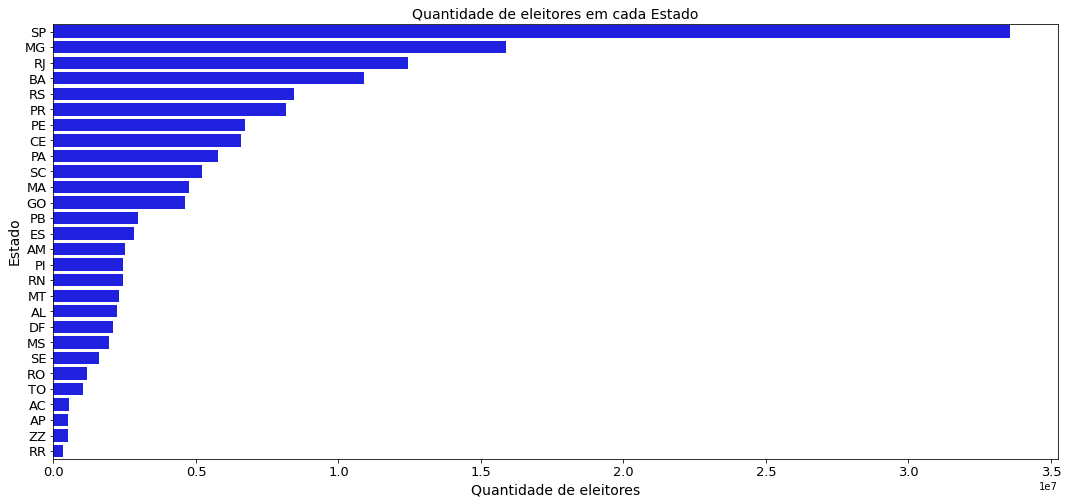

In [12]:
f, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x="QT_ELEITORES_PERFIL", y="SG_UF", data=df_qtd_eleitores_por_estado,label="Total", color='b')
plt.title('Quantidade de eleitores em cada Estado', fontsize=14)
plt.xlabel('Quantidade de eleitores', fontsize=14)
plt.ylabel('Estado', fontsize=14)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
f.show()

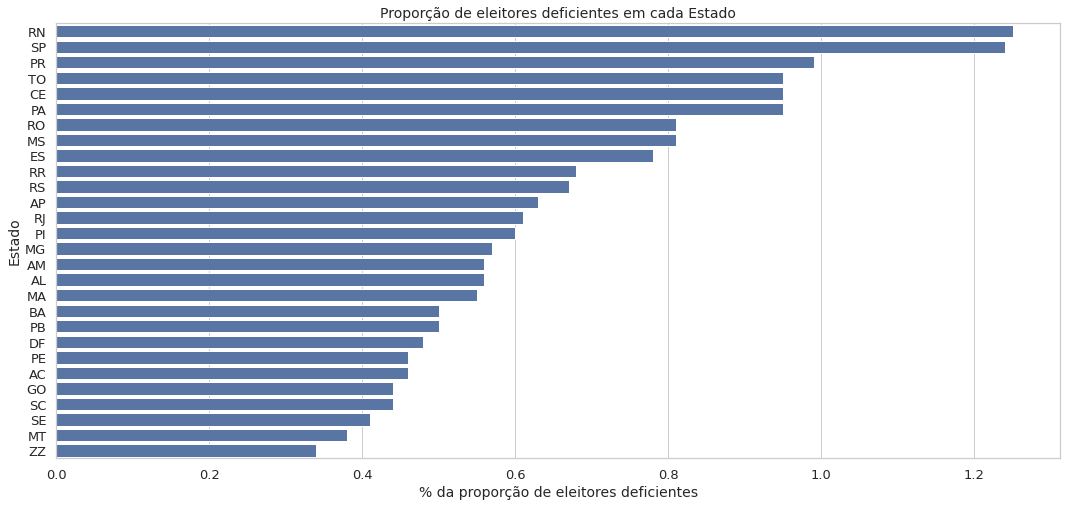

In [13]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x="%_ELEITORES_DEFICIENTES", y="SG_UF", data=df_qtd_eleitores_por_estado.sort_values('%_ELEITORES_DEFICIENTES', ascending=False), label="Total", color="b")
plt.title("Proporção de eleitores deficientes em cada Estado", fontsize=14)
plt.xlabel('% da proporção de eleitores deficientes', fontsize=14)
plt.ylabel('Estado', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
f.show()

In [15]:
df_escolaridade = df.groupby('DS_GRAU_ESCOLARIDADE').sum('QT_ELEITORES_PERFIL')['QT_ELEITORES_PERFIL'].sort_values(ascending=False)
df_escolaridade = df_escolaridade.to_frame().reset_index()

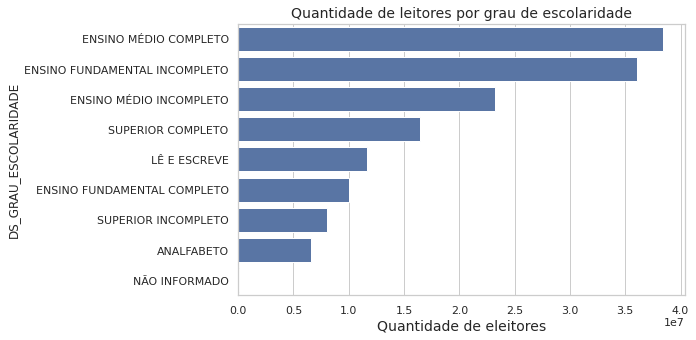

In [16]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='QT_ELEITORES_PERFIL', y='DS_GRAU_ESCOLARIDADE', data=df_escolaridade, label="Total", color="b")
plt.title("Quantidade de leitores por grau de escolaridade", fontsize=14)
plt.xlabel('Quantidade de eleitores', fontsize=14)
#plt.ylabel('Estado', fontsize=14)
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)
f.show()



---



## **Questão B - Calcular a média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas:**

**Média Aritmética**

In [ ]:
media_aritmetica_eleitores = round(st.mean(df.groupby(['SG_UF']).sum()['QT_ELEITORES_PERFIL']))
media_aritmetica_eleitores_deficientes = round(st.mean(df.groupby(['SG_UF']).sum()['QT_ELEITORES_DEFICIENCIA']))
media_porcentagem_eleitores_deficientes = round(st.mean(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES']), 2)

In [ ]:
df_b = pd.DataFrame({'':['Eleitores por Estado','Eleitores Deficientes por Estado','Proporção eleitores deficientes por Estado (%)'],
                     'Média Aritmética': ["{0:,}".format(media_aritmetica_eleitores).replace(',','.'), 
                                           "{0:,}".format(media_aritmetica_eleitores_deficientes).replace(',','.'),
                                          "{0}".format(media_porcentagem_eleitores_deficientes)]})

**Mediana**

In [ ]:
mediana_eleitores_por_estado = round(st.median(df.groupby(['SG_UF']).sum()['QT_ELEITORES_PERFIL']))
mediana_eleitores_deficientes_por_estado = round(st.median(df.groupby(['SG_UF']).sum()['QT_ELEITORES_DEFICIENCIA']))
mediana_porcentagem_eleitores_deficientes = round(st.median(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES']), 2)

In [ ]:
df_b['Mediana'] = pd.DataFrame({'Mediana': ["{0:,}".format(mediana_eleitores_por_estado).replace(',','.'), 
                          "{0:,}".format(mediana_eleitores_deficientes_por_estado).replace(',','.'),
                          "{0}".format(mediana_porcentagem_eleitores_deficientes)]})

**Desvio padrão**

In [ ]:
desviopadrao_eleitores_por_estado = st.pstdev(df.groupby(['SG_UF']).sum()['QT_ELEITORES_PERFIL'])
desviopadrao_eleitores_deficientes_por_estado = st.pstdev(df.groupby(['SG_UF']).sum()['QT_ELEITORES_DEFICIENCIA'])
desviopadrao_proporcao_eleitores_deficientes = round(st.pstdev(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES']), 2)

In [ ]:
df_b['Desvio-padrão'] = pd.DataFrame({'Desvio-padrão':["{0:,}".format(round(desviopadrao_eleitores_por_estado)).replace(',','.'),
                               "{0:,}".format(round(desviopadrao_eleitores_deficientes_por_estado)).replace(',','.'),
                               "{0}".format(desviopadrao_proporcao_eleitores_deficientes)]})

**Coeficiente de variação**

In [ ]:
def cv(n) :
    num = 100 * st.stdev(n)/st.mean(n)
    return round(num, 2)

In [ ]:
cv_eleitores_por_estado = cv(df.groupby(['SG_UF']).sum()['QT_ELEITORES_PERFIL'])
cv_eleitores_deficientes_por_estado = cv(df.groupby(['SG_UF']).sum()['QT_ELEITORES_DEFICIENCIA'])
cv_proporcao_eleitores_deficientes = cv(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'])

In [ ]:
df_b['CV(%)'] = pd.DataFrame({'CV(%)': [cv_eleitores_por_estado, cv_eleitores_deficientes_por_estado, cv_proporcao_eleitores_deficientes]})

In [ ]:
df_b

,,Média Aritmética,Mediana,Desvio-padrão,CV(%)
0,Eleitores por Estado,5.375.701,2.656.700,6.636.549,125.72
1,Eleitores Deficientes por Estado,41.799,17.905,76.162,185.55
2,Proporção eleitores deficientes por Estado (%),0.66,0.58,0.24,37.34


Simetria: 

1.   Assimetria Positiva Mo<Md< $$ \bar{X}
2.  Simétrica Mo<Md<\bar{X}



**Simétria**

In [ ]:
df_c = df.groupby('SG_UF').sum()[['QT_ELEITORES_PERFIL','QT_ELEITORES_DEFICIENCIA']]
df_c.reset_index(inplace=True)

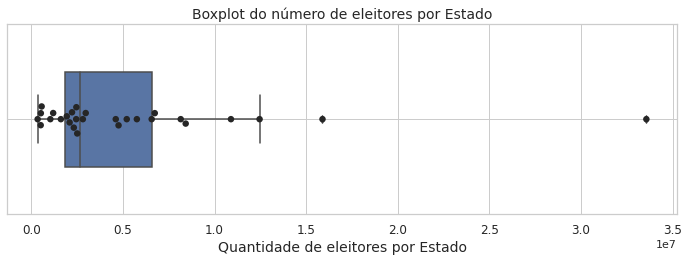

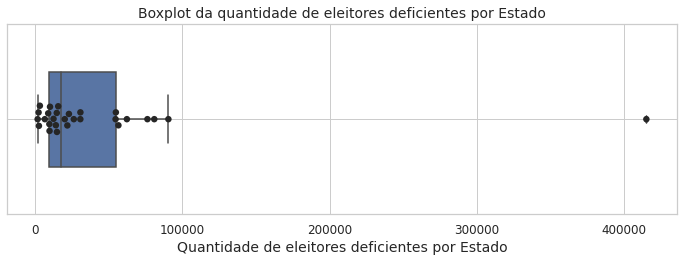

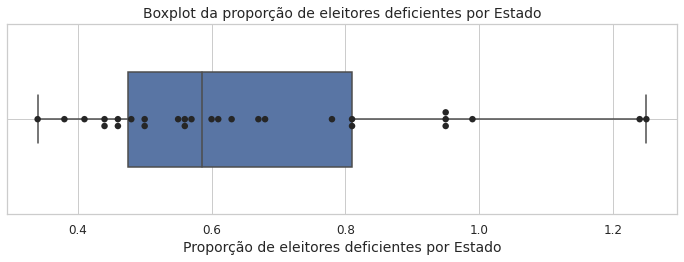

In [ ]:
#print("SIMÉTRIA DAS VARIÁVEIS QUANTATIVAS")
#sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(12,3.5))
#ax.set_xscale("log")
ax = sns.boxplot(x='QT_ELEITORES_PERFIL', data=df_c, width=.5)
ax = sns.swarmplot(x="QT_ELEITORES_PERFIL", data=df_c, color=".15", size=6.5)
plt.title("Boxplot do número de eleitores por Estado", fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.xlabel('Quantidade de eleitores por Estado', fontsize=14)

f, ax = plt.subplots(figsize=(12,3.5))
ax = sns.boxplot(x='QT_ELEITORES_DEFICIENCIA', data=df_c, width=.5)
ax = sns.swarmplot(x="QT_ELEITORES_DEFICIENCIA", data=df_c, color=".15", size=6.5)
plt.title('Boxplot da quantidade de eleitores deficientes por Estado', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.xlabel('Quantidade de eleitores deficientes por Estado', fontsize=14)
f.show()

f, ax = plt.subplots(figsize=(12,3.5))
ax = sns.boxplot(x='%_ELEITORES_DEFICIENTES', data=df_qtd_eleitores_por_estado, width=.5)
ax = sns.swarmplot(x="%_ELEITORES_DEFICIENTES", data=df_qtd_eleitores_por_estado, color=".15", size=6.5)
plt.title('Boxplot da proporção de eleitores deficientes por Estado', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.xlabel('Proporção de eleitores deficientes por Estado', fontsize=14)
f.show()



---



## **Questão C - Analisar a normalidade dos dados numéricos e se existe a presença de outliers:**

Normalidade dos dados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

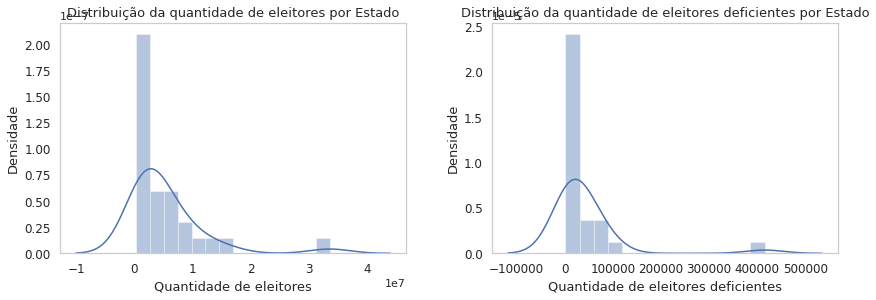

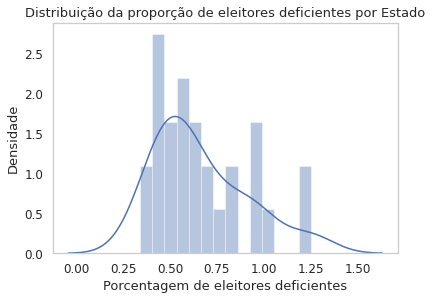

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 0.8, 0.8])
sns.distplot(df_c['QT_ELEITORES_PERFIL'], kde=True, bins=14)
ax.set_title("Distribuição da quantidade de eleitores por Estado", fontsize=13)
ax.set_ylabel("Densidade", fontsize=13)
ax.set_xlabel("Quantidade de eleitores", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()

ax2 = fig.add_axes([1, 1, 0.8, 0.8])
sns.distplot(df_c['QT_ELEITORES_DEFICIENCIA'], kde=True, bins=14)
ax2.set_title("Distribuição da quantidade de eleitores deficientes por Estado", fontsize=13)
ax2.set_ylabel("Densidade", fontsize=13)
ax2.set_xlabel("Quantidade de eleitores deficientes", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.grid()

fig = plt.figure()
ax = fig.add_axes([1, 1, 0.8, 0.8])
sns.distplot(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'], kde=True, bins=14)
ax.set_title("Distribuição da proporção de eleitores deficientes por Estado", fontsize=13)
ax.set_ylabel("Densidade", fontsize=13)
ax.set_xlabel("Porcentagem de eleitores deficientes", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
fig.show()

In [ ]:
print("Cálculo do SHAPIRO:")
print("Quantidade de eleitores por Estado:")
shapiro_stat, shapiro_p_valor = stats.shapiro(df_c['QT_ELEITORES_PERFIL'])
print("O valor calculado do teste de Shapiro-Wilk é de = " + str(shapiro_stat))
print("O p-valor calculado para o teste de Shapiro-Wilk é de =" + str(shapiro_p_valor))
#Quantidade de eleitores deficientes por Estado
print("\nQuantidade de eleitores deficientes por Estado:")
shapiro_stat, shapiro_p_valor = stats.shapiro(df_c['QT_ELEITORES_DEFICIENCIA'])
print("O valor calculado do teste de Shapiro-Wilk é de =" + str(shapiro_stat))
print("O p-valor calculado para o teste de Shapiro-Wilk é de =" + str(shapiro_p_valor))
#Proporção de eleitores deficientes por Estado
print("\nPercentual de eleitores deficientes por Estado:")
shapiro_stat, shapiro_p_valor = stats.shapiro(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'])
print("O valor calculado do teste de Shapiro-Wilk é de =" + str(shapiro_stat))
print("O p-valor calculado para o teste de Shapiro-Wilk é de =" + str(shapiro_p_valor))

Cálculo do SHAPIRO:
Quantidade de eleitores por Estado:
O valor calculado do teste de Shapiro-Wilk é de = 0.6670661568641663
O p-valor calculado para o teste de Shapiro-Wilk é de =1.008382355394133e-06

Quantidade de eleitores deficientes por Estado:
O valor calculado do teste de Shapiro-Wilk é de =0.4582386612892151
O p-valor calculado para o teste de Shapiro-Wilk é de =4.353856830618952e-09

Percentual de eleitores deficientes por Estado:
O valor calculado do teste de Shapiro-Wilk é de =0.8992046117782593
O p-valor calculado para o teste de Shapiro-Wilk é de =0.010960926301777363



Compare o valor de p com o nível de significância. 
Geralmente, um nível de significância (denotado como α ou alfa) de 0,05 funciona bem. Um nível de significância de 0,05 indica um risco de 5% de concluir que os dados não seguem a distribuição normal quando eles realmente a seguem.

1.   **Se o valor p ≤ 0,05**: Assumimos que a distribuição de nossa variável não é normal / gaussiana.
2. S**e o valor-p> 0,05**: Assumimos que a distribuição de nossa variável é normal / gaussiana, ou seja, a amostra provém de uma distribuição gaussiana.

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/how-to/normality-test/interpret-the-results/all-statistics-and-graphs/
https://rpubs.com/paternogbc/46768

In [ ]:
df_c = df.groupby('SG_UF').sum()[['QT_ELEITORES_PERFIL','QT_ELEITORES_DEFICIENCIA']]
df_c.reset_index(inplace=True)

Outliers

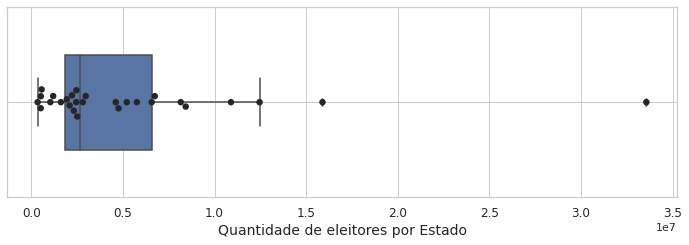

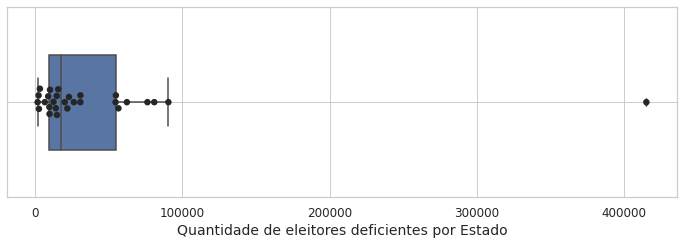

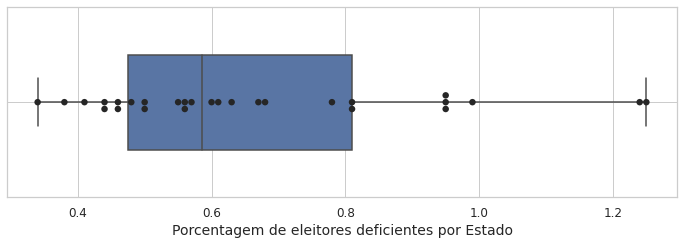

In [ ]:
#sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(12,3.5))
#ax.set_xscale("log")
ax = sns.boxplot(x='QT_ELEITORES_PERFIL', data=df_c, width=.5)
ax = sns.swarmplot(x="QT_ELEITORES_PERFIL", data=df_c, color=".15", size=6.5)
plt.grid(True)
plt.xticks(fontsize=12)
plt.xlabel('Quantidade de eleitores por Estado', fontsize=14)

f, ax = plt.subplots(figsize=(12,3.5))
ax = sns.boxplot(x='QT_ELEITORES_DEFICIENCIA', data=df_c, width=.5)
ax = sns.swarmplot(x="QT_ELEITORES_DEFICIENCIA", data=df_c, color=".15", size=6.5)
plt.grid(True)
plt.xticks(fontsize=12)
plt.xlabel('Quantidade de eleitores deficientes por Estado', fontsize=14)
f.show()

f, ax = plt.subplots(figsize=(12,3.5))
ax = sns.boxplot(x='%_ELEITORES_DEFICIENTES', data=df_qtd_eleitores_por_estado, width=.5)
ax = sns.swarmplot(x="%_ELEITORES_DEFICIENTES", data=df_qtd_eleitores_por_estado, color=".15", size=6.5)
plt.grid(True)
plt.xticks(fontsize=12)
plt.xlabel('Porcentagem de eleitores deficientes por Estado', fontsize=14)
f.show()

In [ ]:
df_qtd_eleitores_por_estado.sort_values('QT_ELEITORES_PERFIL', ascending=False).set_index('SG_UF')

,QT_ELEITORES_PERFIL,QT_ELEITORES_DEFICIENCIA,%_ELEITORES_DEFICIENTES
SG_UF,,,
SP,33565294,415034,1.24
MG,15889559,90487,0.57
RJ,12455812,76254,0.61
BA,10893320,54829,0.50
RS,8423308,56555,0.67
PR,8152710,80909,0.99
PE,6735391,30748,0.46
CE,6567760,62312,0.95
PA,5758119,54633,0.95


In [ ]:
stats.describe(df_qtd_eleitores_por_estado['QT_ELEITORES_PERFIL'])

DescribeResult(nobs=28, minmax=(342651, 33565294), mean=5375701.25, variance=45675035995011.0, skewness=2.8372298633514186, kurtosis=8.988730905105967)

## **Questão D - Comparar as variáveis quantitativas e descrever qual é mais homogênea:**

In [ ]:
df_b

,,Média Aritmética,Mediana,Desvio-padrão,CV(%)
0,Eleitores por Estado,5.375.701,2.656.700,6.636.549,125.72
1,Eleitores Deficientes por Estado,41.799,17.905,76.162,185.55
2,Proporção eleitores deficientes por Estado (%),0.66,0.58,0.24,37.34


## **Questão E - Calcular os respectivos Intervalos de Confiança ao nível de 95% para cada campo do data frame:**

$$
IC = \bar{X} ± \frac{Z} {\sqrt [2] { n } } $$ Z  para 95% = 1,96



In [ ]:
# Intervalo de Confiança da quantidade de eleitores por Estado
n=len(df_qtd_eleitores_por_estado['QT_ELEITORES_PERFIL'])
media=st.mean(df_qtd_eleitores_por_estado['QT_ELEITORES_PERFIL'])
dp=st.stdev(df_qtd_eleitores_por_estado['QT_ELEITORES_PERFIL'])
inf,sup = t.interval(0.95, len(df_qtd_eleitores_por_estado['QT_ELEITORES_PERFIL'])-1, loc=media, scale=dp/np.sqrt(n))
print('Intervalo de confiança da Quantidade de Eleitores por Estado:')
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

# Intervalo de Confiança da quantidade de eleitores deficientes por Estado
n=len(df_qtd_eleitores_por_estado['QT_ELEITORES_DEFICIENCIA'])
media=st.mean(df_qtd_eleitores_por_estado['QT_ELEITORES_DEFICIENCIA'])
dp=st.stdev(df_qtd_eleitores_por_estado['QT_ELEITORES_DEFICIENCIA'])
inf,sup = t.interval(0.95, len(df_qtd_eleitores_por_estado['QT_ELEITORES_DEFICIENCIA'])-1, loc=media, scale=dp/np.sqrt(n))
print('\nIntervalo de confiança da Quantidade de Eleitores Deficientes por Estado:')
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

# Intervalo de Confiança para a proporção de eleitores deficientes por estado
n=len(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'])
media=st.mean(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'])
dp=st.stdev(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'])
inf,sup = t.interval(0.95, len(df_qtd_eleitores_por_estado['%_ELEITORES_DEFICIENTES'])-1, loc=media, scale=dp/np.sqrt(n))
print('\nIntervalo de confiança da proporção de Eleitores por Estado:')
print ('Limite inferior:', round(inf,2))
print ('Limite superior:', round(sup,2))

Intervalo de confiança da Quantidade de Eleitores por Estado:
Limite inferior: 2755094.12
Limite superior: 7996308.38

Intervalo de confiança da Quantidade de Eleitores Deficientes por Estado:
Limite inferior: 11724.82
Limite superior: 71873.61

Intervalo de confiança da proporção de Eleitores por Estado:
Limite inferior: 0.57
Limite superior: 0.76




---



## **Questão F - Comparar a média de um campo numérico em relação a um campo categórico e responder se existe diferença estatística ao nível de 5% de significância:**

**Variáveis**
As variáveis podem assumir diferentes valores, que basicamente podem ser separados em:  1. Quantitativos ou numéricos e 2. Qualitativos ou não numéricos, ou categóricos
**Classificação de variáveis**
As variáveis quantitativas ou numéricas podem ser:
Discretas: assumem apenas valores inteiros. Ex.: número de irmãos, número de passageiros
Contínuas: assume qualquer valor no intervalo dos números reais. Ex.: peso, altura
As variáveis qualitativas ou categóricas podem ser:

Nominais: quando as categorias não possuem uma ordem natural. Ex.: nomes, cores, sexo.
Ordinais: quando as categorias podem ser ordenadas. Ex.: tamanho (pequeno, médio, grande), classe social (baixa, média, alta), grau de instrução (básico, médio, graduação, pós-graduação)
Exemplo : http://www.est.ufmg.br/portal/arquivos/rts/qui_bio.pdf



---



## **Questão G - Realizar um cruzamento de dois campos categóricos e responder se existe diferença estatística ao nível de 5% de significância:**

http://www.est.ufmg.br/portal/arquivos/rts/qui_bio.pdf